# **Heart Disease Prediction**

![image](Heart3.png)

## 1. **BUSINESS UNDERSTANDING**

### a. Introduction

Heart disease, particularly coronary artery disease (CAD), is a leading cause of morbidity and mortality worldwide. Early detection and accurate diagnosis are crucial for effective treatment and prevention of severe outcomes. Machine learning has the potential to significantly enhance the predictive accuracy for CAD, offering a powerful tool for healthcare providers. This project aims to leverage a comprehensive heart disease dataset, created by combining five well-known datasets, to develop a predictive model for CAD.

### b. Problem Statement
### **What is the prevailing Circumstance?**

Despite advances in medical technology, the early detection and diagnosis of coronary artery disease remain challenging. Traditional diagnostic methods can be time-consuming, costly, and may not always be accurate.
### **What problem is being addressed?**

The project addresses the challenge of improving the early and accurate prediction of coronary artery disease. Current diagnostic methods can be supplemented by a predictive model to provide timely and reliable insights, which are essential for early intervention and better patient outcomes.
### **How the project aims to solve the problems?**

The project aims to develop a machine learning model using a combined dataset from five established heart disease datasets. By training the model on a large and diverse dataset with 11 common features, the predictive accuracy can be enhanced. The model will help healthcare providers in identifying high-risk patients, thereby facilitating early diagnosis and personalized treatment plans.

### c. Objectives

#### Main Objectives
- To develop a machine learning model that can predict the presence of coronary artery disease based on patient data.
#### Specific Objectives
- To clean and preprocess the combined heart disease dataset ensuring data quality and consistency.
- To select and engineer features that significantly contribute to the prediction of CAD.
- To train and validate multiple machine learning models to identify the most accurate and interpretable model.
- To implement the model in a user-friendly interface for healthcare providers.
### d. Notebook Structure
i. Business Understanding <br>

ii. Data Understanding<br>

iii. Exploratory Data Analysis<br>

iv. Data Preprocessing<br>

v. Modeling<br>

vi. Evaluation<br>

vii. Conclusion<br>

viii. Recommendation<br>

ix. Next Steps

### e. Stakeholders
- Healthcare Providers: Physicians, cardiologists, and healthcare professionals who will use the model to aid in diagnosis and treatment.
- Patients: Individuals at risk of or suffering from heart disease who will benefit from early and accurate diagnosis.
- Healthcare Institutions: Hospitals and clinics aiming to improve patient outcomes and optimize resource allocation.
- Researchers: Academics and professionals focused on advancing medical research and machine learning applications in healthcare.
- Insurance Companies: Organizations that can utilize predictive models to assess risk and manage patient care costs effectively.
### f. Metric of Success

- The performance of the model is evaluated based on achieving an accuracy of over 85%.
- Precision and Recall: High precision and recall to ensure reliability and minimize false positives/negatives.

## 2. **Data Understanding**

The data used in this project was obtained from: [Kaggle](https://www.kaggle.com/datasets/mexwell/heart-disease-dataset).

The data set has 1 csv file and  1190 instances with 11 features combines five heart disease datasets to enhance CAD-related machine learning research and improve clinical diagnosis and early treatment.








### Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the datasets

In [18]:
heart = pd.read_csv('heart_disease_dataset.csv')
heart.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [19]:
# Replace spaces with underscores in column names
heart.columns = [col.replace(' ', '_') for col in heart.columns]
heart.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [20]:
# check shape of the datasets
heart.shape

(1190, 12)

In [21]:
#check info of the dataset
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting_bp_s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting_blood_sugar  1190 non-null   int64  
 6   resting_ecg          1190 non-null   int64  
 7   max_heart_rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST_slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [22]:
# Description of the data
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest_pain_type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting_bp_s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting_blood_sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting_ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max_heart_rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise_angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


### Data Cleaning

In [23]:
# Checking the column names  in the dataset
print("Column names of  dataset:")
print(list(heart.columns))

Column names of  dataset:
['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak', 'ST_slope', 'target']


In [24]:
# Check for duplicates
heart.duplicated().sum()

272

In [25]:
# View duplicate rows
duplicates = heart[heart.duplicated()]
print(duplicates)


      age  sex  chest_pain_type  resting_bp_s  cholesterol  \
163    49    0                2           110          208   
604    58    1                3           150          219   
887    63    1                1           145          233   
888    67    1                4           160          286   
889    67    1                4           120          229   
...   ...  ...              ...           ...          ...   
1156   42    1                3           130          180   
1157   61    1                4           140          207   
1158   66    1                4           160          228   
1159   46    1                4           140          311   
1160   71    0                4           112          149   

      fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_angina  \
163                     0            0             160                0   
604                     0            1             118                1   
887                     1     

In [26]:
# Drop duplicate rows
heart.drop_duplicates(inplace=True)

# Check the number of duplicates after dropping
print("Number of duplicates after dropping:", heart.duplicated().sum())



Number of duplicates after dropping: 0


In [27]:
# Check for missing values
heart.isnull().sum()


age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
ST_slope               0
target                 0
dtype: int64

- This shows the datasets has no missing values

## 3. Exploratory Data Analysis

### Univariate Analysis

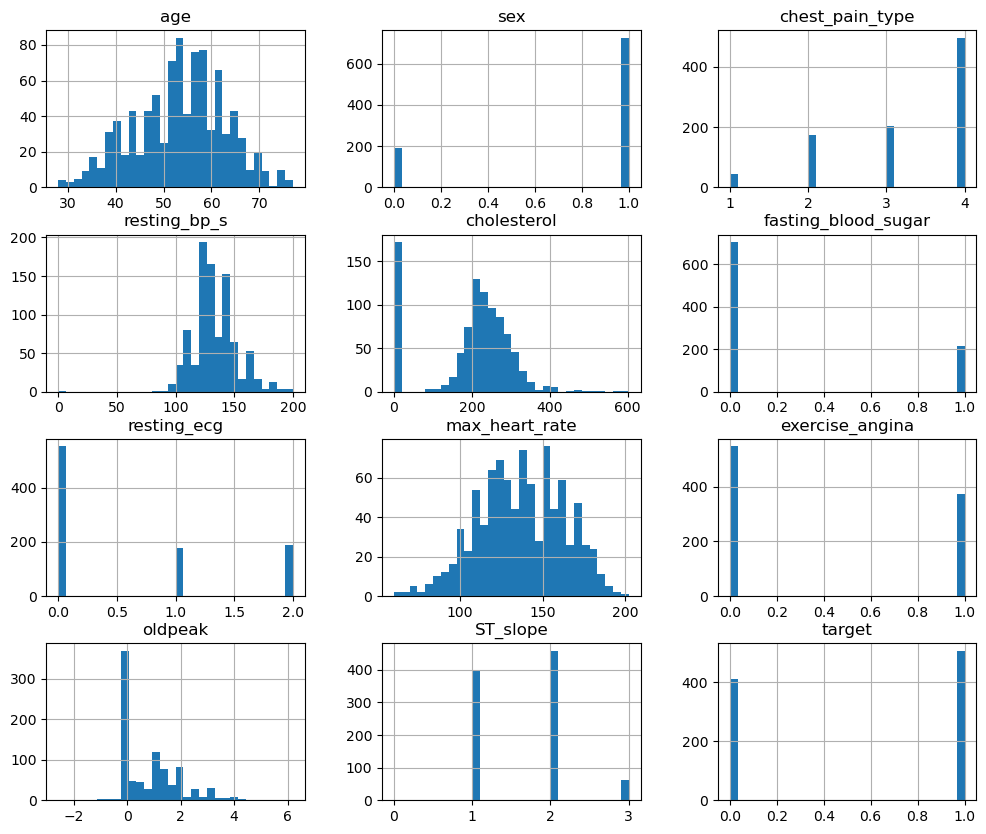

In [28]:
# Plot histograms for all numerical columns
heart.hist(bins=30, figsize=(12, 10))
plt.show()

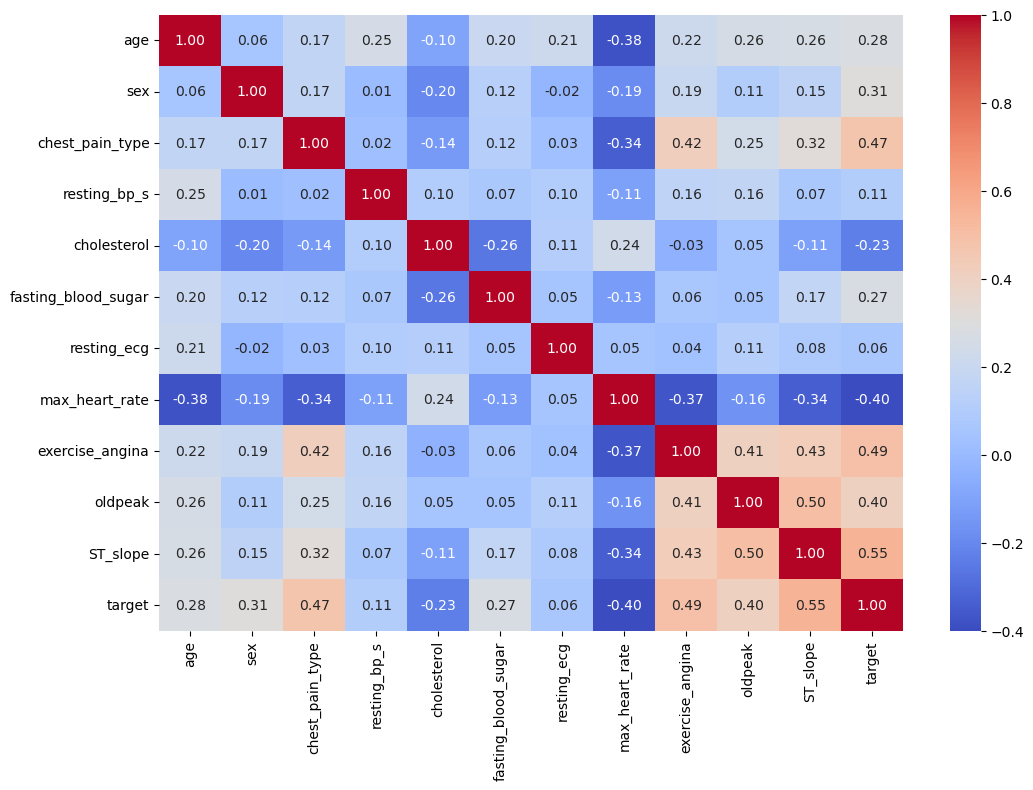

In [29]:
corr_matrix = heart.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


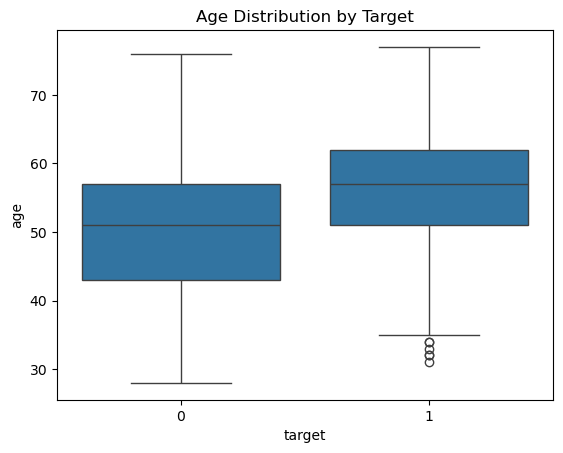

In [30]:
sns.boxplot(x='target', y='age', data=heart)
plt.title('Age Distribution by Target')
plt.show()

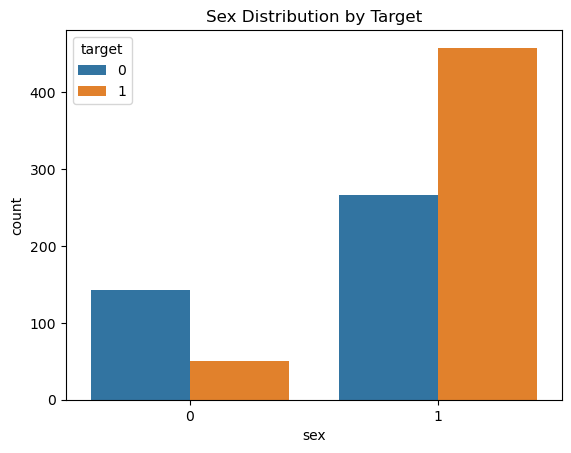

In [31]:
sns.countplot(x='sex', hue='target', data=heart)
plt.title('Sex Distribution by Target')
plt.show()


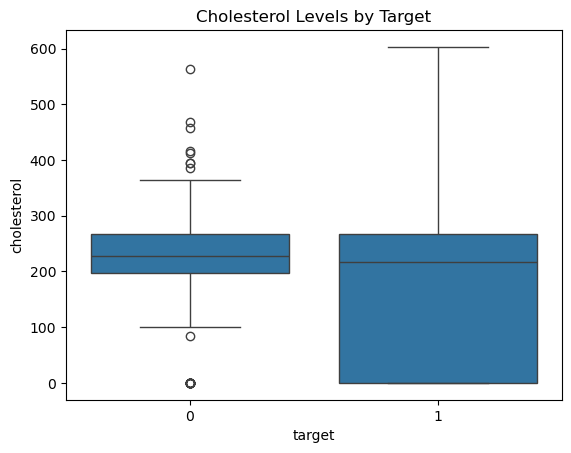

In [32]:
sns.boxplot(x='target', y='cholesterol', data=heart)
plt.title('Cholesterol Levels by Target')
plt.show()

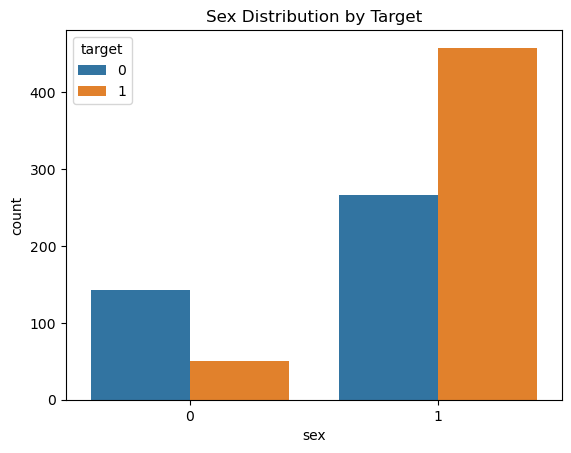

In [33]:
sns.countplot(x='sex', hue='target', data=heart)
plt.title('Sex Distribution by Target')
plt.show()


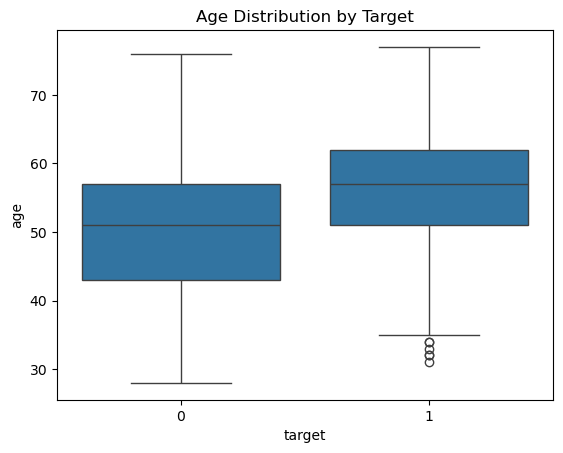

In [34]:
sns.boxplot(x='target', y='age', data=heart)
plt.title('Age Distribution by Target')
plt.show()

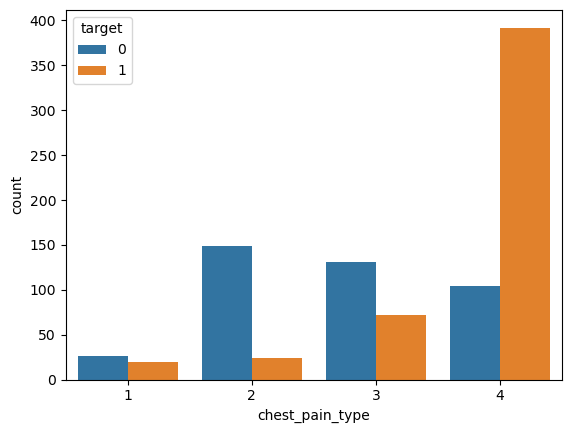

In [35]:
sns.countplot(x='chest_pain_type', hue='target', data=heart)
plt.show()


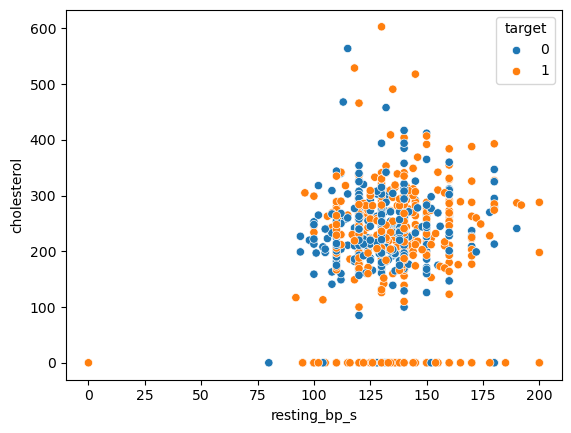

In [36]:
sns.scatterplot(x='resting_bp_s', y='cholesterol', hue='target', data=heart)
plt.show()

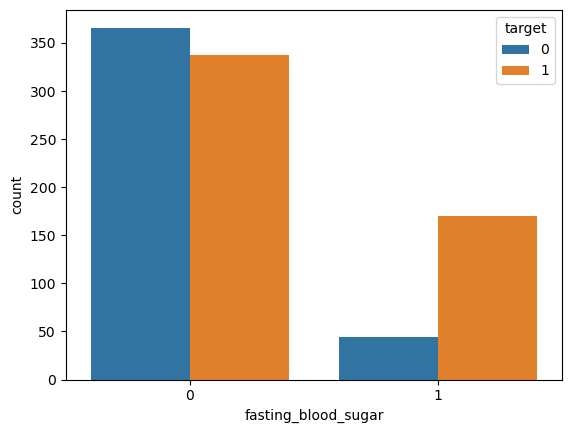

In [37]:
sns.countplot(x='fasting_blood_sugar', hue='target', data=heart)
plt.show()


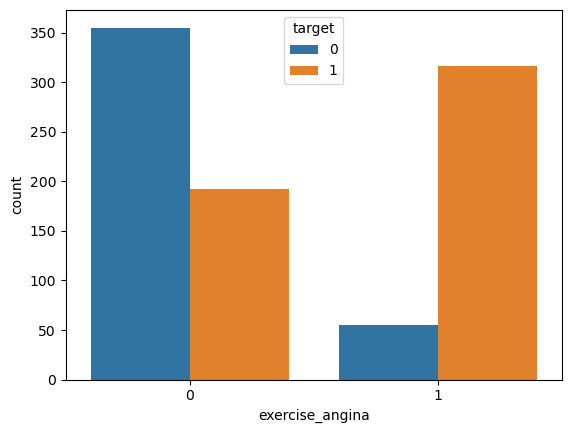

In [38]:
sns.countplot(x='exercise_angina', hue='target', data=heart)
plt.show()